<a href="https://colab.research.google.com/github/rrben/Regressao/blob/main/Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


from statsmodels.tsa.arima.model import ARIMA

In [ ]:
!pip install scipy

In [ ]:
!pip install pmdarima

In [4]:
from pmdarima.arima import auto_arima

In [5]:
# vamos importar a base de produção de energia elétrica
df = pd.read_excel('temperature.xlsx', index_col='Date', parse_dates=True)
df.head()

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-02-01,17.9
1981-03-01,18.8
1981-04-01,14.6
1981-05-01,15.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3647 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [7]:
df['Daily minimum temperatures'] = df['Daily minimum temperatures'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3647 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [9]:
df.head

<bound method NDFrame.head of             Daily minimum temperatures
Date                                  
1981-01-01                        20.7
1981-02-01                        17.9
1981-03-01                        18.8
1981-04-01                        14.6
1981-05-01                        15.8
...                                ...
1990-12-27                        14.0
1990-12-28                        13.6
1990-12-29                        13.5
1990-12-30                        15.7
1990-12-31                        13.0

[3647 rows x 1 columns]>

<Axes: xlabel='Date'>

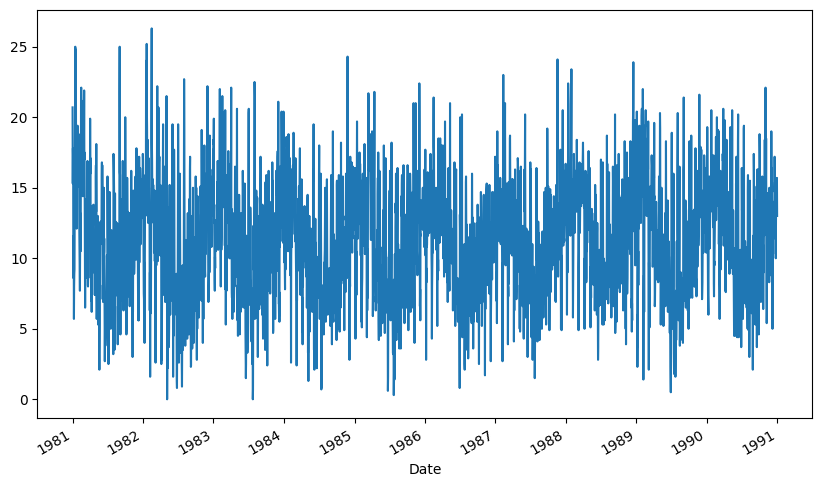

In [10]:
df['Daily minimum temperatures'].plot(figsize=(10,6))

In [11]:
df.head()

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-02-01,17.9
1981-03-01,18.8
1981-04-01,14.6
1981-05-01,15.8


In [12]:
df.index.min(), df.index.max()

(Timestamp('1981-01-01 00:00:00'), Timestamp('1990-12-31 00:00:00'))

In [13]:
df.sort_index(inplace=True)

<Figure size 800x600 with 0 Axes>

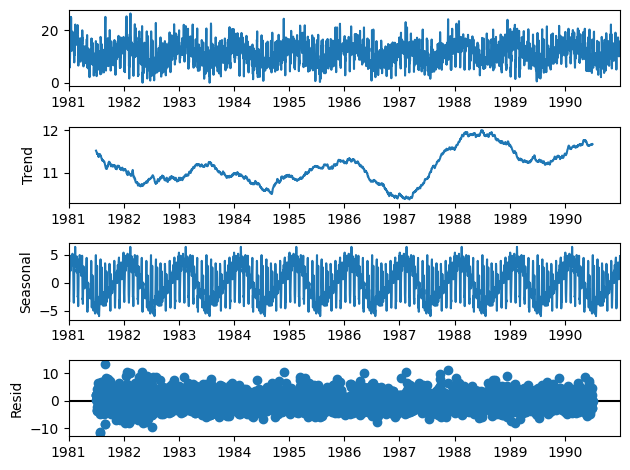

In [14]:
# Primeiro, vamos decompor a série pra avaliar tendência
# Sazonalidade e resíduo
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(df, model="add",period=365)

fig = plt.figure(figsize=(8, 6))  
fig = resultado.plot()

In [15]:
# Teste de estacionariedade. 
# A hipótese nula é que a série não é estacionária
# Ou seja, se o p-valor for menor que 0,05, rejeitamos
# que a série não é estacionária. Caso seja maior, não podemos
# descartar que a série não é estacionária
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Daily minimum temperatures'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-3.331541412968857
p-valor:0.01352611219545271


In [16]:
# Auto ARIMA nos ajuda a buscar os melhores parâmetros
fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True, 
                           m=6, 
                           D=1, 
                           start_P=1, 
                           start_Q=1, 
                           max_P=2, 
                           max_Q=2, 
                           information_criterion='aic',
                           trace=True, 
                           error_action='ignore', 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=32.49 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=22211.573, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=20978.709, Time=1.45 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=10.08 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=22068.931, Time=0.39 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=20482.431, Time=1.89 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=14.55 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=7.38 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=20662.364, Time=1.00 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=20418.687, Time=2.12 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=20927.151, Time=1.20 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=18.78 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=9.70 sec
 ARIMA(3,1,0)(2,1,0)[6]             : AIC=20352.684, Time=2.56 sec
 ARIMA(3,1,0)(1,1,0)[6]             : AIC=20872.994

In [ ]:
# Agora que sabemos os melhores parâmetros, vamos criar um modelo SARIMAX 
# (versão do arima com parametros para sazonalidade)

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df,order=(3,1,0))
resultado_sarimax = model.fit()

In [18]:
# resultados do modelo SARIMAX(3,1,0)
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     Daily minimum temperatures   No. Observations:                 3647
Model:                       SARIMAX(3, 1, 0)   Log Likelihood               -9612.137
Date:                        Fri, 12 May 2023   AIC                          19232.275
Time:                                20:26:03   BIC                          19257.080
Sample:                                     0   HQIC                         19241.109
                                       - 3647                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2906      0.015    -19.257      0.000      -0.320      -0.261
ar.L2         -0.1721      0.015    -11.262      0.000      -0.202      -0.142
ar.L3         -0.1215      0.016     -7.719      0.000      -0.152      -0.091
sigma2        11.4141      0.224     51.061      0.000      10.976      11.852
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):               117.31
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# Vamos realizar um "backtesting" com predições de valores dos 12 meses anteriores
predicoes = resultado_sarimax.get_prediction(start=-60)
predicao_media = predicoes.predicted_mean

In [20]:
# intervalo de confiança

intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]

(13.215902333969314, 26.45930394097881)

In [21]:
predicao_media[0]

19.837603137474062

In [22]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

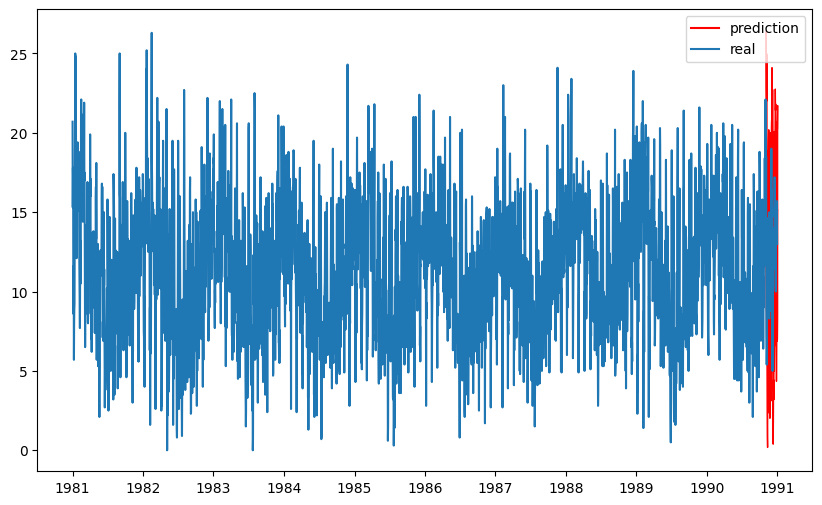

In [23]:
plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_sarima = sqrt(mean_squared_error(df[-60:].values,predicao_media.values))
print(rmse_sarima)

3.012457329818421


## Prevendo com XGBoost

In [25]:
from xgboost import XGBRegressor

In [26]:
treino = df.loc[df.index <= '1988-12-31']
validacao = df.loc[df.index > '1989-01-01']

treino.shape, validacao.shape

((2917, 1), (729, 1))

In [27]:
treino.index.min(), treino.index.max()

(Timestamp('1981-01-01 00:00:00'), Timestamp('1988-12-30 00:00:00'))

In [28]:
validacao.index.min(), validacao.index.max()

(Timestamp('1989-01-02 00:00:00'), Timestamp('1990-12-31 00:00:00'))

In [29]:
treino['Daily minimum temperatures']

Date
1981-01-01    20.7
1981-01-02    15.3
1981-01-03    17.8
1981-01-04    16.7
1981-01-05     8.6
              ... 
1988-12-26     9.5
1988-12-27    12.9
1988-12-28    12.9
1988-12-29    14.8
1988-12-30    14.1
Name: Daily minimum temperatures, Length: 2917, dtype: float64

In [30]:
treino['Daily minimum temperatures'].shift(-1)

Date
1981-01-01    15.3
1981-01-02    17.8
1981-01-03    16.7
1981-01-04     8.6
1981-01-05    11.6
              ... 
1988-12-26    12.9
1988-12-27    12.9
1988-12-28    14.8
1988-12-29    14.1
1988-12-30     NaN
Name: Daily minimum temperatures, Length: 2917, dtype: float64

In [ ]:
treino['target'] = treino['Daily minimum temperatures'].shift(-1)
treino.head()

In [32]:
treino.tail()

,Daily minimum temperatures,target
Date,,
1988-12-26,9.5,12.9
1988-12-27,12.9,12.9
1988-12-28,12.9,14.8
1988-12-29,14.8,14.1
1988-12-30,14.1,NaN


In [33]:
treino = treino.dropna()
treino.tail()

,Daily minimum temperatures,target
Date,,
1988-12-25,15.8,9.5
1988-12-26,9.5,12.9
1988-12-27,12.9,12.9
1988-12-28,12.9,14.8
1988-12-29,14.8,14.1


In [34]:
validacao['target'] = validacao['Daily minimum temperatures'].shift(-1)
validacao.head()

<ipython-input-34-2c30723a2fe4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao['target'] = validacao['Daily minimum temperatures'].shift(-1)


,Daily minimum temperatures,target
Date,,
1989-01-02,16.1,20.4
1989-01-03,20.4,13.3
1989-01-04,13.3,14.2
1989-01-05,14.2,2.3
1989-01-06,2.3,6.0


In [35]:
validacao.tail()

,Daily minimum temperatures,target
Date,,
1990-12-27,14.0,13.6
1990-12-28,13.6,13.5
1990-12-29,13.5,15.7
1990-12-30,15.7,13.0
1990-12-31,13.0,NaN


In [36]:
validacao = validacao.dropna()
validacao.tail()

,Daily minimum temperatures,target
Date,,
1990-12-26,14.6,14.0
1990-12-27,14.0,13.6
1990-12-28,13.6,13.5
1990-12-29,13.5,15.7
1990-12-30,15.7,13.0


In [37]:
X_treino = treino.loc[:, ['Daily minimum temperatures']].values
y_treino = treino.loc[:, ['target']].values
X_validacao = validacao.loc[:, ['Daily minimum temperatures']].values
y_validacao = validacao.loc[:, ['target']].values

X_treino.shape, y_treino.shape, X_validacao.shape, y_validacao.shape

((2916, 1), (2916, 1), (728, 1), (728, 1))

In [38]:
modelo_xgba = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
modelo_xgba.fit(X_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [39]:
validacao.iloc[0]

Daily minimum temperatures    16.1
target                        20.4
Name: 1989-01-02 00:00:00, dtype: float64

In [40]:
predicao = modelo_xgba.predict(X_validacao)
predicao

array([15.416948 , 18.699797 , 13.846863 , 12.732546 ,  2.4051156,
        7.9743357,  5.1026764,  9.052493 , 11.124948 ,  8.57722  ,
       13.678968 , 12.221774 , 12.069542 , 21.062908 , 17.193264 ,
       14.670411 , 12.82692  , 12.667715 , 15.141195 , 13.759426 ,
       13.081266 , 12.100415 , 12.199565 , 13.740696 , 14.392499 ,
       14.812003 , 10.900132 , 14.066723 , 15.483112 , 14.812003 ,
       15.200877 , 14.787373 , 17.449106 , 13.730662 , 14.157446 ,
        4.098926 ,  7.841806 ,  9.065861 ,  9.052493 ,  9.121672 ,
        9.94322  , 17.599787 , 16.199526 , 17.599787 , 17.193264 ,
       17.193264 , 14.6719885, 13.934235 , 13.725577 , 13.081266 ,
       15.416948 , 13.716874 , 11.739092 , 14.392499 , 15.614069 ,
       12.384481 , 15.116622 , 16.225931 , 16.225931 , 13.678968 ,
       18.519197 , 12.732546 , 11.758794 ,  6.7999077,  9.068335 ,
        8.57722  ,  7.100708 ,  9.696598 ,  8.841853 , 13.005589 ,
       12.252076 , 13.730662 , 13.081266 , 13.743934 , 11.5576

In [41]:
validacao["pred"] = predicao
validacao.head()

,Daily minimum temperatures,target,pred
Date,,,
1989-01-02,16.1,20.4,15.416948
1989-01-03,20.4,13.3,18.699797
1989-01-04,13.3,14.2,13.846863
1989-01-05,14.2,2.3,12.732546
1989-01-06,2.3,6.0,2.405116


In [42]:
mean_squared_error(X_validacao, predicao)

3.5760037830418296